# Analysis
An Analysis of the change in Facebook's value due to the recent news regarding the leakage of data and it use by Cambridge Analytica.

Using material from the blog:https://towardsdatascience.com/stock-prediction-in-python-b66555171a2

In [45]:
from stocker import Stocker
import matplotlib.pyplot as plt
%matplotlib inline
#Instantiating a Stocker Object
fb=Stocker('FB')

FB Stocker Initialized. Data covers 2012-05-18 to 2018-03-27.


In [46]:
history=fb.stock
history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,2012-05-18,38.2318,-3.8182
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,2012-05-21,34.0300,-2.5000
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,2012-05-22,31.0000,-1.6100
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,2012-05-23,32.0000,0.6300
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,2012-05-24,33.0300,0.0800


Maximum Adj. Close = 193.09 on 2018-02-01.
Minimum Adj. Close = 17.73 on 2012-09-04.
Current Adj. Close = 152.19 on 2018-03-27.



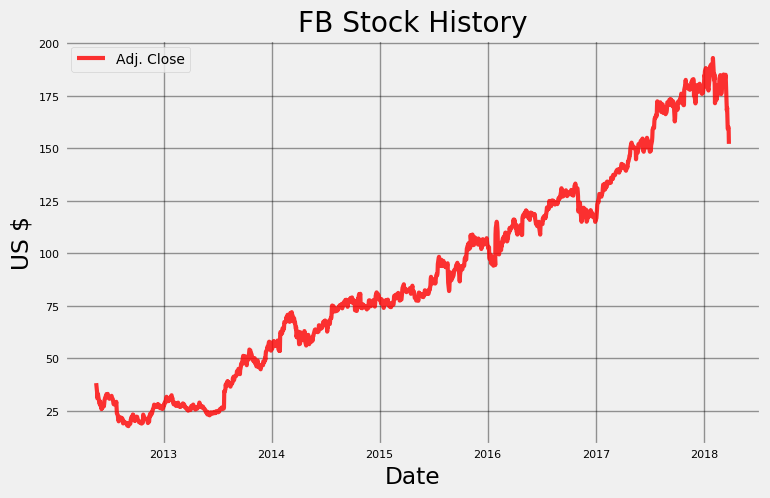

In [47]:
fb.plot_stock()

Maximum Daily Change = 6.74 on 2018-02-06.
Minimum Daily Change = -9.46 on 2018-02-08.
Current Daily Change = -4.12 on 2018-03-27.

Maximum Adj. Volume = 128925534.00 on 2018-03-20.
Minimum Adj. Volume = 8054219.00 on 2017-10-03.
Current Adj. Volume = 76787884.00 on 2018-03-27.



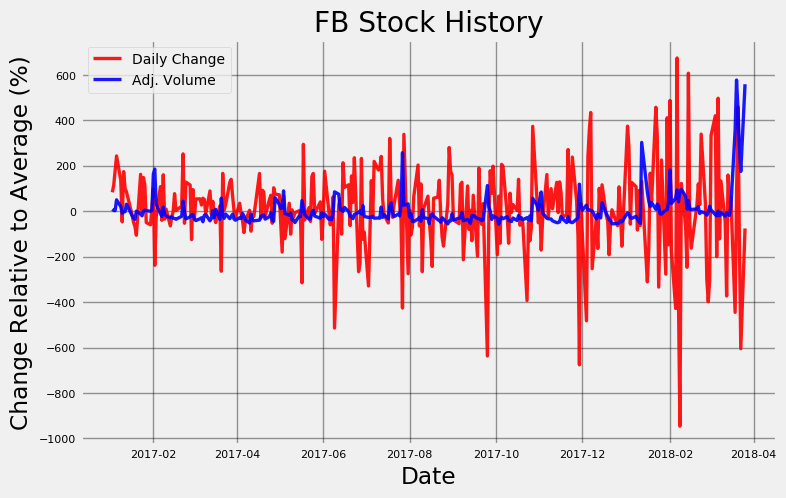

In [48]:
fb.plot_stock(start_date = '2017-01-01', end_date = '2018-03-26', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

FB Total buy and hold profit from 2018-02-01 to 2018-03-26 for 100 shares = $-2816.00


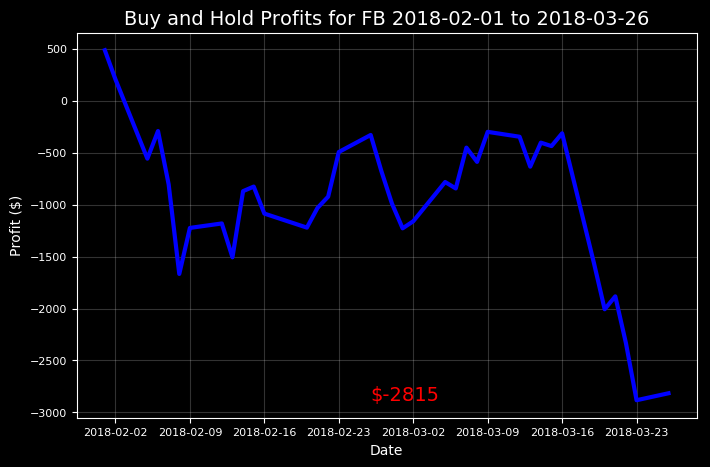

In [65]:
#Potential Profit/Loss with the purchase of a 100 shares on the 1st of February,2018
fb.buy_and_hold(start_date='2018-02-01', end_date='2018-03-26', nshares=100)

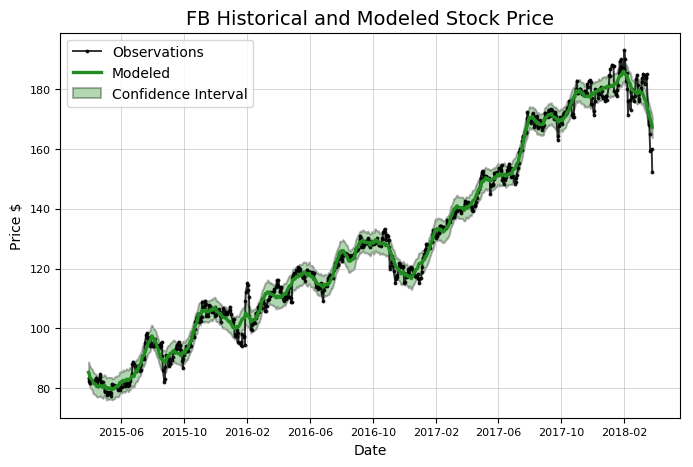

In [66]:
#Using Additive Modelling with the help of Prophet which was developed by Facebook
model, model_data = fb.create_prophet_model()

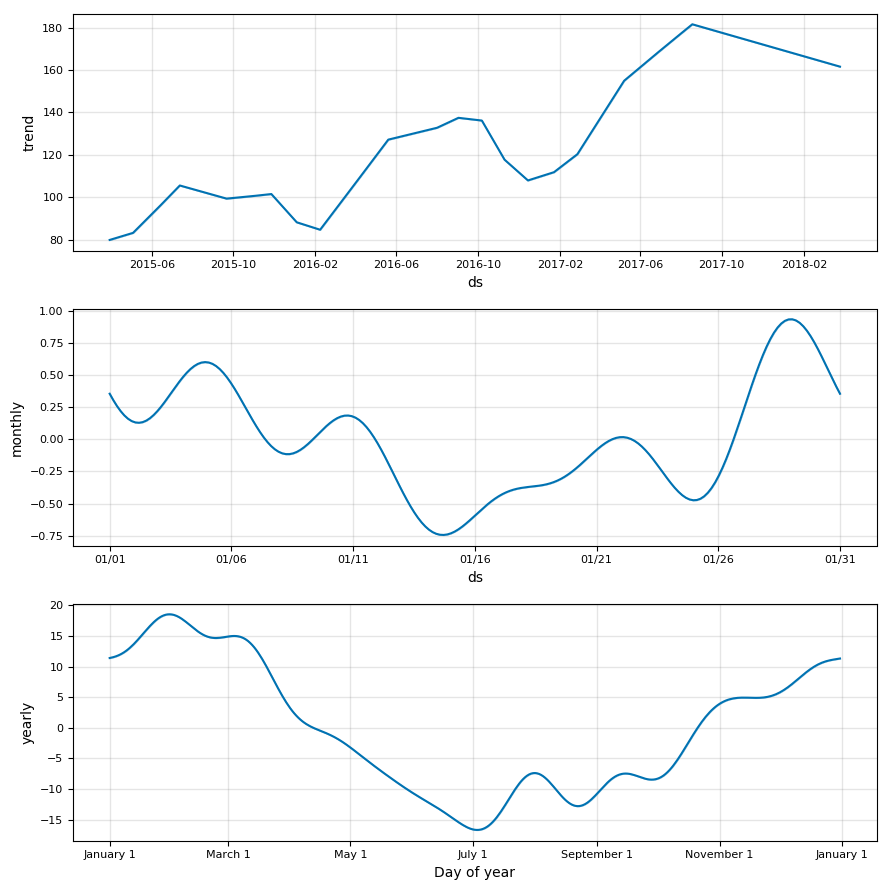

In [67]:
#Trend Monthly,Yearly
model.plot_components(model_data)
plt.show()

The trend was in the upward direction until the recent drop due to the news regarding the data leakage

### Identifying the Changepoints 


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
217 2016-02-08       99.75  2.911352
386 2016-10-07      128.99 -2.864671
72  2015-07-13       90.10 -2.334763
169 2015-11-27      105.45 -2.177965
434 2016-12-15      120.57  2.145667


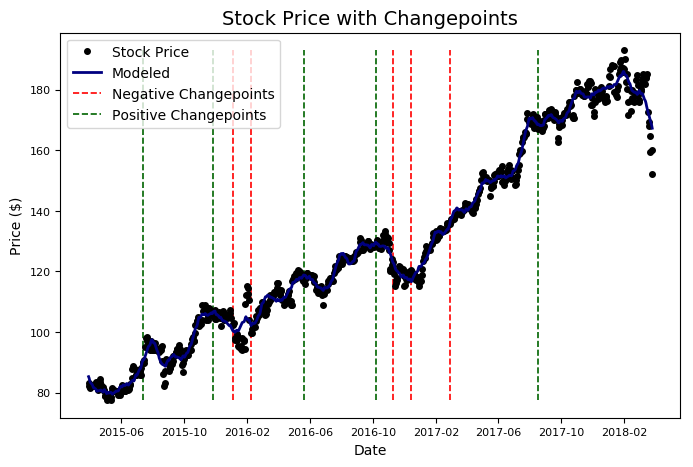

In [68]:
#Identifying the changepoints in the first *)% of the data
fb.changepoint_date_analysis()


 Top Related Queries: 

                                               query  value
0                                  value of facebook    100
1                                     login facebook     97
2                                  facebook login in     62
3                facebook login in facebook login in     62
4  facebook login in facebook login in l f p valu...     53

 Rising Related Queries: 

                                               query    value
0  facebook login in facebook login in l f p valu...  1271900
1            facebook login in facebook login in l f  1230100
2    facebook login in facebook login in l f p value  1209800
3  facebook login in facebook login in l f p valu...   426600
4  facebook login in facebook login in l f p valu...   415150


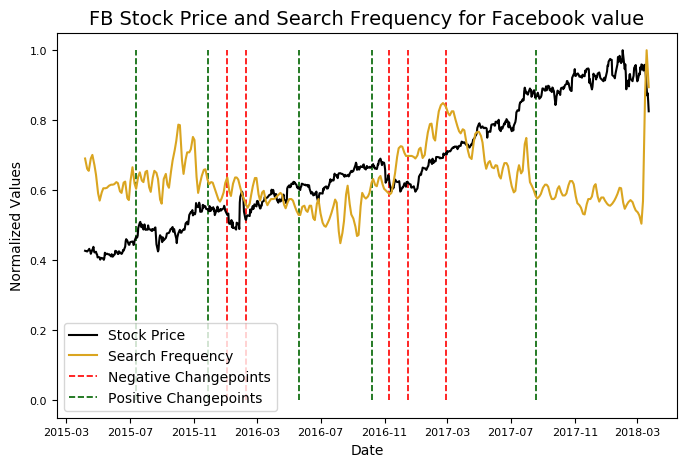

In [69]:
#Looking at the connection between the search terms and the stock price
fb.changepoint_date_analysis(search = 'Facebook value')

As can be seen there is a sudden increase in the search online regarding facebook's value in the last couple of weeks

## Predictions


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $179.76.
Actual price on    2018-03-23 = $159.39.

Average Absolute Error on Training Data = $1.51.
Average Absolute Error on Testing  Data = $8.72.

When the model predicted an increase, the price increased 52.38% of the time.
When the model predicted a  decrease, the price decreased  41.98% of the time.

The actual value was within the 80% confidence interval 94.80% of the time.


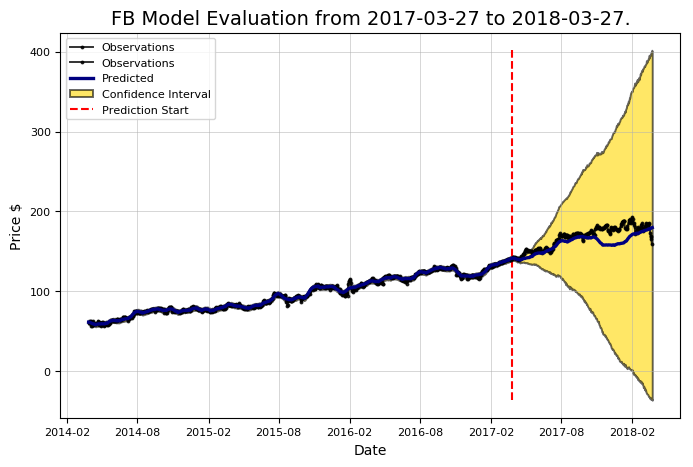

In [70]:
#Identifying the accuracy of the model
#training is done on the 3 years prior to the test period.
fb.weekly_seasonality=False #Turning off the weekly seasonality
fb.evaluate_prediction()

Since the accuracy is not good we now focus on the optimization of the model's hyperparameters.

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints but could lead to overfitting while lowering it could cause the opposite ie underfitting. 

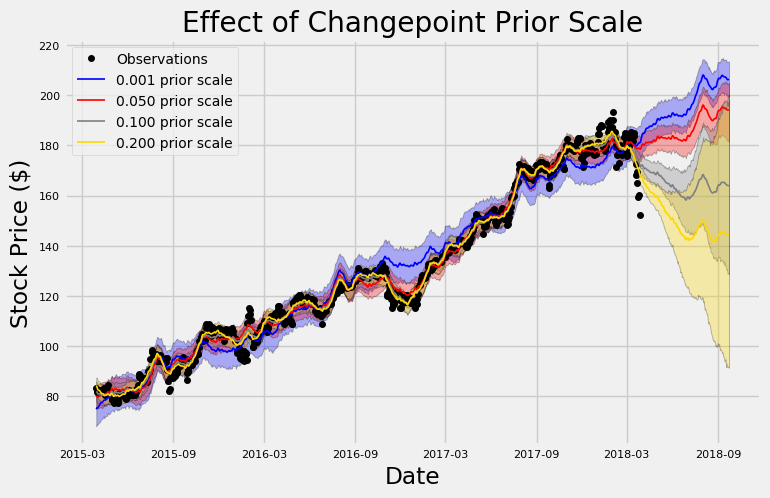

In [71]:
fb.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

Now we derive actual numbers to back up what we observed from the above plot


Validation Range 2016-01-04 to 2017-01-03.

     cps  train_err  train_range  test_err  test_range
0  0.001   4.015531    12.591609  6.254601   12.642034
1  0.050   2.334993     7.467016  5.356039   13.491842
2  0.100   1.958235     6.314203  8.531563   39.560867
3  0.200   1.467174     4.839165  9.804466  121.296998


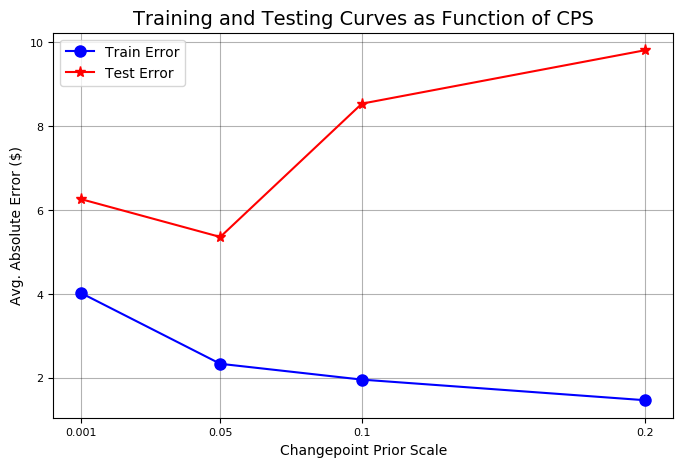

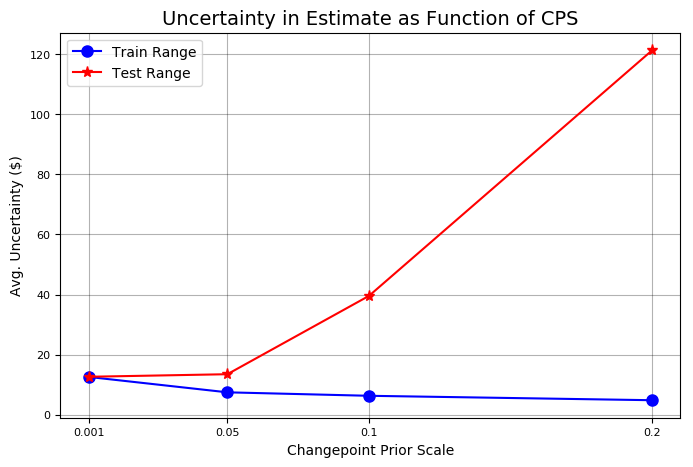

In [72]:
fb.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object.

In [73]:
fb.changepoint_prior_scale = 0.5


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $179.76.
Actual price on    2018-03-23 = $159.39.

Average Absolute Error on Training Data = $1.51.
Average Absolute Error on Testing  Data = $8.72.

When the model predicted an increase, the price increased 52.38% of the time.
When the model predicted a  decrease, the price decreased  41.98% of the time.

The actual value was within the 80% confidence interval 94.80% of the time.


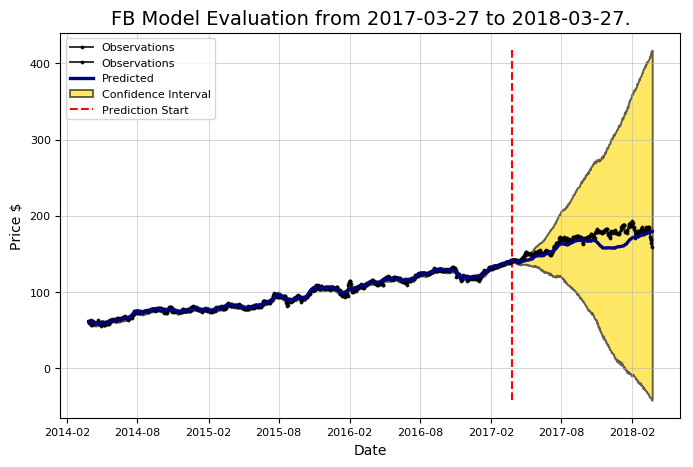

In [74]:
#Evaluating updated model
fb.evaluate_prediction()


Predicted Increase: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []

Predicted Decrease: 

         Date    estimate    change       upper       lower
1  2018-03-28  166.437561 -0.887159  169.936506  162.800887
2  2018-03-29  165.823143 -0.614418  169.440278  162.176145
3  2018-03-30  165.582441 -0.240702  169.376468  162.227217
5  2018-04-01  165.345873 -0.236568  168.902724  161.801948
6  2018-04-02  164.793969 -0.551903  168.112709  160.978339
7  2018-04-03  163.963241 -0.830729  167.465430  160.625719
8  2018-04-04  163.164207 -0.799034  166.710890  159.630403
9  2018-04-05  162.664112 -0.500095  166.427965  158.989378
10 2018-04-06  162.463256 -0.200856  165.710932  158.514010


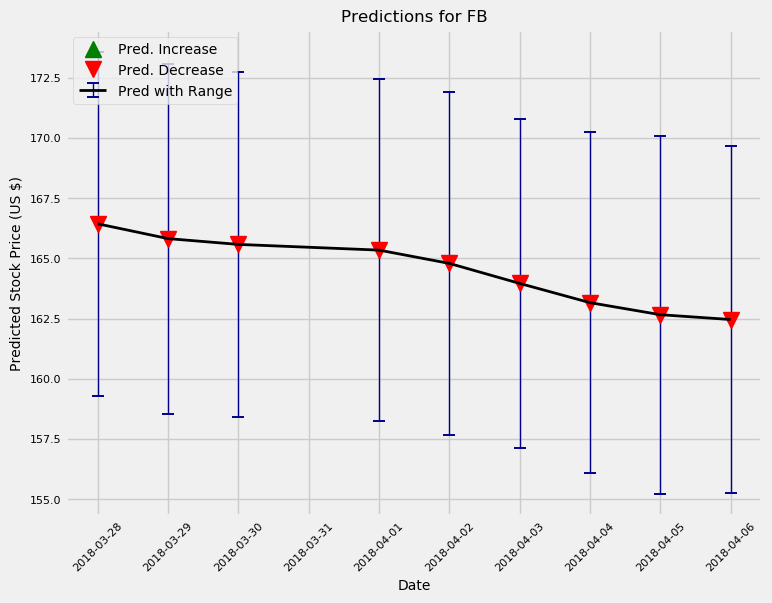

In [75]:
#Prediction for the next 10 days
fb.predict_future(days=10)

In [76]:
import warnings; warnings.simplefilter('ignore')